In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### 📊 Dataset Description

* **id**: Unique identifier for each customer
* **Gender**: Gender of the customer
* **Age**: Age of the customer
* **Driving_License**:

  * `1` → Customer has a valid driving license
  * `0` → Customer does not have a driving license
* **Region_Code**: Unique code representing the customer’s region
* **Previously_Insured**:

  * `1` → Customer already has vehicle insurance
  * `0` → Customer does not have vehicle insurance
* **Vehicle_Age**: Age category of the vehicle
* **Vehicle_Damage**:

  * `1` → Vehicle has been damaged in the past
  * `0` → Vehicle has not been damaged
* **Annual_Premium**: Annual premium amount paid by the customer
* **Policy_Sales_Channel**: Encoded identifier for the sales channel
  (e.g., agent, online, phone, in-person, etc.)
* **Vintage**: Number of days the customer has been associated with the company
* **Response**:

  * `1` → Customer is interested in purchasing vehicle insurance
  * `0` → Customer is not interested

## EDA (Exploratory Data Analysis)

In [3]:
df.shape

(381109, 12)

In [4]:
# checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
# checking distribution for target column
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [8]:
# Set global style for better visuals
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (8, 5)

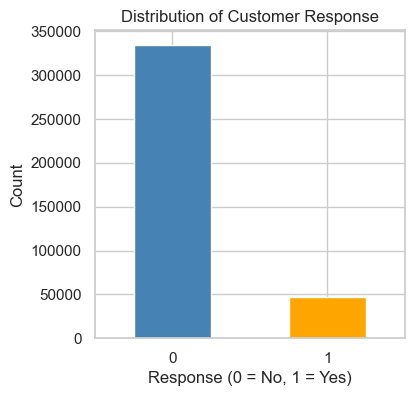

In [9]:
# 1. Target Variable Distribution (Response)

plt.figure(figsize=(4, 4))
df['Response'].value_counts().plot(kind='bar', color=['steelblue', 'orange'])
plt.title('Distribution of Customer Response')
plt.xlabel('Response (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


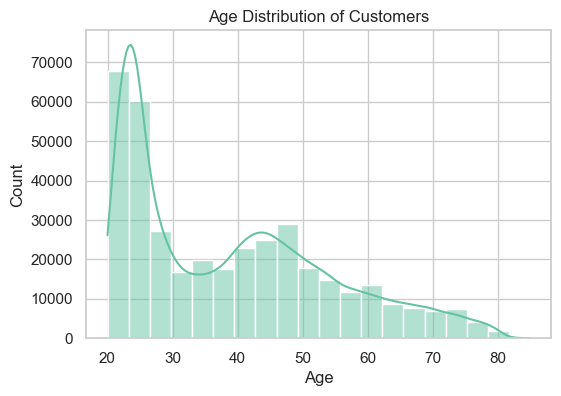

In [10]:
# 2. Age Distribution

plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

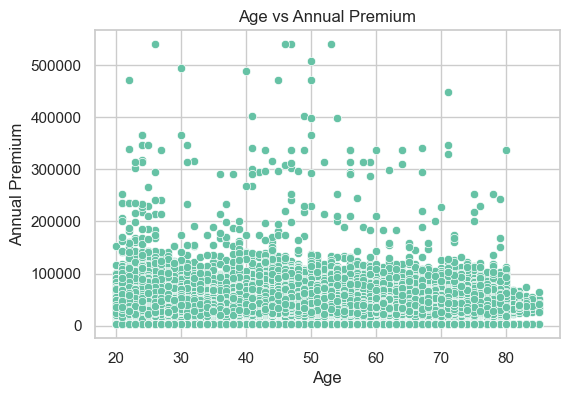

In [11]:
# 3. Age vs Annual Premium

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Annual_Premium', data=df)
plt.title('Age vs Annual Premium')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.show()

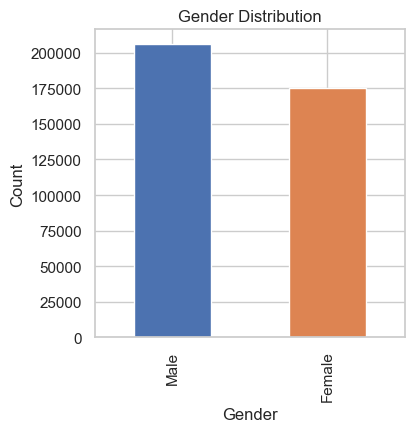

In [12]:
# 4. Gender Distribution

plt.figure(figsize=(4, 4))
df['Gender'].value_counts().plot(kind='bar', color=['#4C72B0', '#DD8452'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

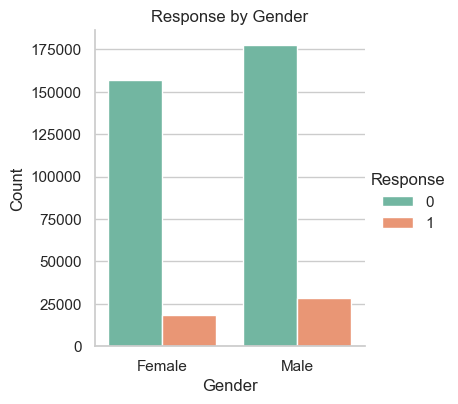

In [13]:
# 5. Gender vs Response

gender_response = (
    df.groupby(['Gender', 'Response'])
    .size()
    .reset_index(name='Count')
)

sns.catplot(
    data=gender_response,
    x='Gender',
    y='Count',
    hue='Response',
    kind='bar',
    height=4,
    aspect=1
)
plt.title('Response by Gender')
plt.show()

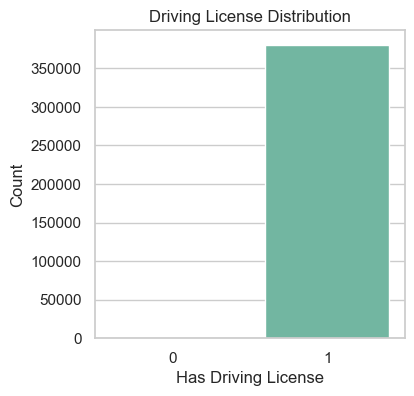

In [14]:
# 6. Driving License Distribution

plt.figure(figsize=(4, 4))
sns.countplot(x='Driving_License', data=df)
plt.title('Driving License Distribution')
plt.xlabel('Has Driving License')
plt.ylabel('Count')
plt.show()

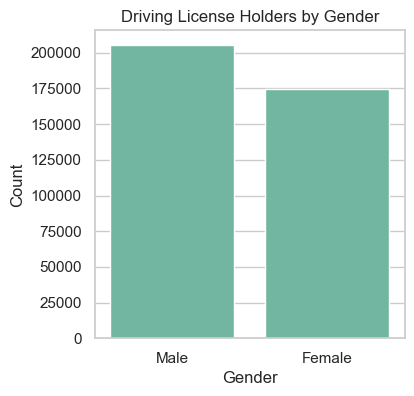

In [15]:
# 7. Gender vs Driving License Holders

license_holders = df[df['Driving_License'] == 1]

plt.figure(figsize=(4, 4))
sns.countplot(x='Gender', data=license_holders)
plt.title('Driving License Holders by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

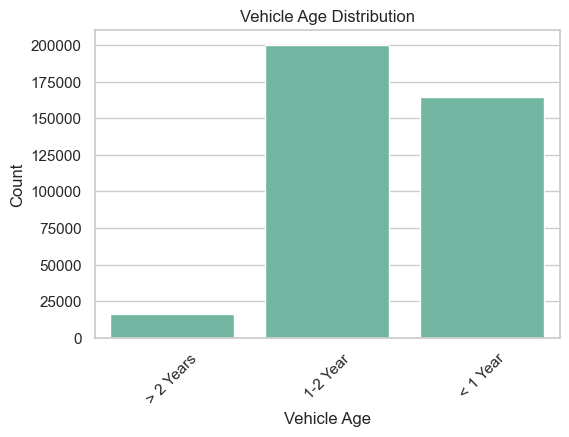

In [16]:
# 8. Vehicle Age Distribution

plt.figure(figsize=(6, 4))
sns.countplot(x='Vehicle_Age', data=df)
plt.title('Vehicle Age Distribution')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

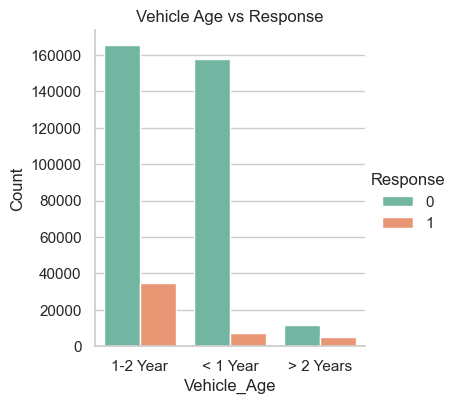

In [17]:
# 9. Vehicle Age vs Response

vehicle_age_response = (
    df.groupby(['Vehicle_Age', 'Response'])
    .size()
    .reset_index(name='Count')
)

sns.catplot(
    data=vehicle_age_response,
    x='Vehicle_Age',
    y='Count',
    hue='Response',
    kind='bar',
    height=4,
    aspect=1
)
plt.title('Vehicle Age vs Response')
plt.show()

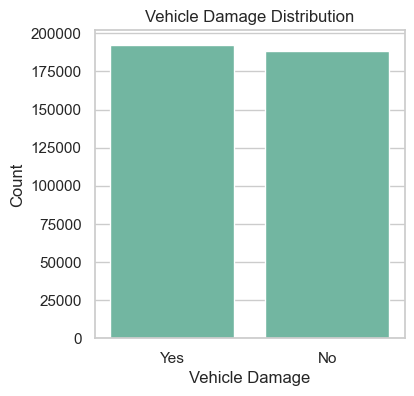

In [18]:
# 10. Vehicle Damage Distribution

plt.figure(figsize=(4, 4))
sns.countplot(x='Vehicle_Damage', data=df)
plt.title('Vehicle Damage Distribution')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

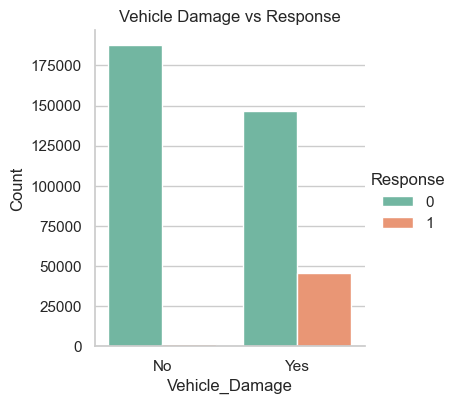

In [19]:
# 11. Vehicle Damage vs Response

vehicle_damage_response = (
    df.groupby(['Vehicle_Damage', 'Response'])
    .size()
    .reset_index(name='Count')
)

sns.catplot(
    data=vehicle_damage_response,
    x='Vehicle_Damage',
    y='Count',
    hue='Response',
    kind='bar',
    height=4,
    aspect=1
)
plt.title('Vehicle Damage vs Response')
plt.show()

In [20]:
# 12. Annual Premium Statistics

df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

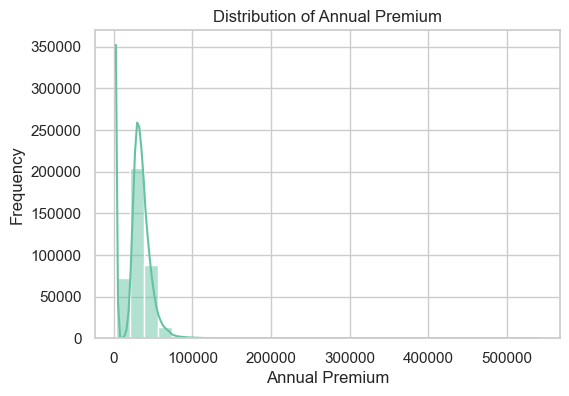

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Annual_Premium'], bins=30, kde=True)
plt.title('Distribution of Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()

# 📊 **Overall Data Analysis Conclusion**

Based on the exploratory data analysis performed on the Vehicle Insurance dataset, several important insights can be drawn regarding customer behavior, risk patterns, and potential business strategies.

---

## 🔹 1. Customer Response Behavior

* The dataset is **highly imbalanced**, with a **large majority of customers not responding** to the insurance offer.
* Only a small portion of customers show interest in purchasing insurance.
* This imbalance indicates that **predictive modeling must address class imbalance**, using techniques such as:

  * Class weighting
  * SMOTE / oversampling
  * Precision–Recall based evaluation metrics

---

## 🔹 2. Age Distribution Insights

* Most customers fall between **20–50 years of age**.
* Younger and middle-aged individuals dominate the dataset.
* Very few customers are above 70 years old.

📌 **Inference:**
Age is a significant demographic feature and may influence purchasing behavior, especially for mid-aged customers.

---

## 🔹 3. Annual Premium Analysis

* The **annual premium distribution is right-skewed**, meaning:

  * Most customers pay relatively lower premiums.
  * A small number of customers pay very high premiums.
* The majority of premiums fall below **₹40,000**, with extreme outliers beyond ₹500,000.

📌 **Insight:**
Premium values may need normalization or transformation before modeling.

---

## 🔹 4. Gender-Based Analysis

* Male customers slightly outnumber female customers.
* However, the **response rate difference between genders is not drastic**.
* Gender alone is **not a strong predictor** of response.

---

## 🔹 5. Vehicle Age Impact

* Vehicles aged **1–2 years** dominate the dataset.
* Customers with vehicles in this category show a **higher response rate** compared to newer or much older vehicles.
* Vehicles older than 2 years show a decline in response.

📌 **Insight:**
Vehicle age is a **strong predictor** of customer interest.

---

## 🔹 6. Driving License Analysis

* Almost all customers possess a valid driving license.
* This feature shows **very little variance**, making it less informative for modeling.

---

## 🔹 7. Vehicle Damage vs Response

* Customers whose vehicles were previously damaged are **significantly more likely** to show interest in insurance.
* This is one of the **strongest predictive features** in the dataset.

---

## 🔹 8. Overall Key Observations

| Feature         | Insight               |
| --------------- | --------------------- |
| Response        | Highly imbalanced     |
| Age             | Moderate influence    |
| Gender          | Low influence         |
| Vehicle Age     | Strong influence      |
| Vehicle Damage  | Very strong predictor |
| Annual Premium  | Skewed distribution   |
| Driving License | Low variance          |

---

## ✅ Final Business & Modeling Insights

* **Target customers**: Those with prior vehicle damage and mid-range vehicle age.
* **Feature engineering priority**: Vehicle age, damage history, and premium amount.
* **Modeling strategy**:

  * Handle class imbalance
  * Use tree-based models (Random Forest, XGBoost)
  * Optimize for recall/ROC-AUC instead of accuracy

---

## 📌 Final Summary (One Line)

> The data reveals that vehicle condition and prior damage are the strongest predictors of insurance interest, while demographic factors play a secondary role.

## Data Preprocessing

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [23]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [24]:
# Mapping 'Gender' col to (0, 1) values
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [25]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Vehicle_Age >> object
Vehicle_Damage >> object
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64


In [26]:
# Creating dummy cols for categorical features

df = pd.get_dummies(df,drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [27]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64
Vehicle_Age_< 1 Year >> bool
Vehicle_Age_> 2 Years >> bool
Vehicle_Damage_Yes >> bool


In [28]:
# Cols renaming and keeping dtype as int

df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

for column in cat_feat:
    df[column] = df[column].astype('str')

In [29]:
# Scaling the data

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])

mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

# Also, dropping id col now

ID = df.id
df = df.drop('id',axis=1)

In [30]:
# Train-Test split

from sklearn.model_selection import train_test_split

train_target = df['Response']
train = df.drop(['Response'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(train,train_target, random_state = 0)

In [31]:
train_target.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

In [32]:
train.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,1,0,0


## Model Training - Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2 , 3, 4, 5, 6, 7, 10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [4, 6, ...], 'min_samples_split': [5, 7, ...], ...}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,101
,error_score,nan


In [34]:
best_params = model.best_params_

print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_depth': 3, 'criterion': 'gini'}


In [35]:
# save model

import pickle

filename = 'rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [36]:
# loading back pickle file

rf_load = pickle.load(open(filename, 'rb'))

## Model Evaluation

In [37]:
from sklearn.metrics import classification_report

y_pred = rf_load.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278

